In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
def imgFilt(img):

    filtered_img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    grimg = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2GRAY)
    
    hsvimg = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2HSV)
        
    lightMask = np.asarray(grimg)
    Mask_indices = lightMask > 150
    filtered_img[Mask_indices] =255
    return filtered_img,Mask_indices

In [5]:
def imgHsvFilt(img):

    filtered_img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    #grimg = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2GRAY)
    
    hsvimg = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2HSV)
        
    h,s,vMask = cv2.split(hsvimg)
    Mask_indices = vMask > 150
    filtered_img[Mask_indices] =255
    #return filtered_img
    return filtered_img,Mask_indices

In [6]:
def detectDark(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv)
    hei,wid,chan = hsv.shape
    ratio = np.sum(v)/(hei*wid*255)
    if(ratio < 0.5):
        return True
    else:
        return False

In [7]:
def color_detection(frame_in):
    # Take each frame
    #frame = cv2.imread(image_name)
        
        
        if(detectDark(frame_in)):
            roiWid = 10
            roiEdg = 8
        else:
            roiWid = 4
            roiEdg = 2
        
        src_height, src_width, src_channels = frame_in.shape
        roiX = int(src_width / roiWid)
        roiWidth = roiX * roiEdg
        roiY = int(src_height / roiWid)
        roiHeight = roiY * roiEdg
        frame = frame_in[roiY : roiY+roiHeight, roiX : roiX+roiWidth]
        
        ##below is changed
        if(filt):
            frame,lightMask = imgFilt(frame)
            src_height, src_width, src_channels = frame.shape
            blockedPxl = sum(np.count_nonzero(e) for e in lightMask)
            max_value = ((src_height*src_width)-blockedPxl)*255
        #print src_height,src_width,max_value
        else:
            src_height, src_width, src_channels = frame.shape
            max_value = src_height * src_width * 255
        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        #hsv= cv2.cvtColor(filtered_img, cv2.COLOR_BGR2HSV)
        # detect red
        lower = np.array([150, 30, 30])
        upper = np.array([190, 255, 255])
        mask1 = cv2.inRange(hsv, lower, upper)
        lower = np.array([0, 30, 30])
        upper = np.array([10, 255, 255])
        mask2 = cv2.inRange(hsv, lower, upper)
        mask = mask1 + mask2
        outmask = mask
        redVal = float(mask.sum()) / float(max_value)
        if redVal > 0.2:
            red="true"
        else:
            red="false"

        # detect yellow
        lower = np.array([20, 100, 100])
        upper = np.array([40, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
        yellowVal = float(mask.sum()) / float(max_value)
        if yellowVal > 0.15:
            yellow="true"
        else:
            yellow="false"

        # detect blue
        lower = np.array([100, 60, 60])
        upper = np.array([140, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
        blueVal = float(mask.sum()) / float(max_value)
        if blueVal > 0.35:
            blue="true"
        else:
            blue="false"

        # detect green (gray)
        lower_green = np.array([103, 86, 65])
        upper_green = np.array([145, 133, 128])
        mask = cv2.inRange(hsv, lower_green, upper_green)
        greenVal = float(mask.sum()) / float(max_value)
        if greenVal > 0.01:
            green="true"
        else:
            green="false"

        #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # detect white
        lower = np.array([0, 0, 140])
        upper = np.array([256, 60, 256])
        mask = cv2.inRange(hsv, lower, upper)
        if(filt):
            whiteVal = float(mask.sum()-blockedPxl*255) / float(max_value)
        else:
            whiteVal = float(mask.sum()) / float(max_value)
        
        if whiteVal > 0.5:
            white="true"
        else:
            white="false"

        # detect black
        lower_black = np.array([110,50,50])
        upper_black= np.array([130,255,255])
        mask = cv2.inRange(hsv, lower_black, upper_black)
        blackVal = float(mask.sum()) / float(max_value)
        if blackVal > 0.01:
            black="true"
        else:
            black="false"

        #return red, yellow, blue, green, white, black
        return redVal, yellowVal, blueVal, greenVal, whiteVal, blackVal
        #return outmask

red,    yellow,   blue,    green,    white,    black
(0.777281746031746, 0.000496031746031746, 0.0, 0.0, 0.07589285714285714, 0.0)
(1.0, 0.0, 0.0, 0.0, 0.0, 0.0)


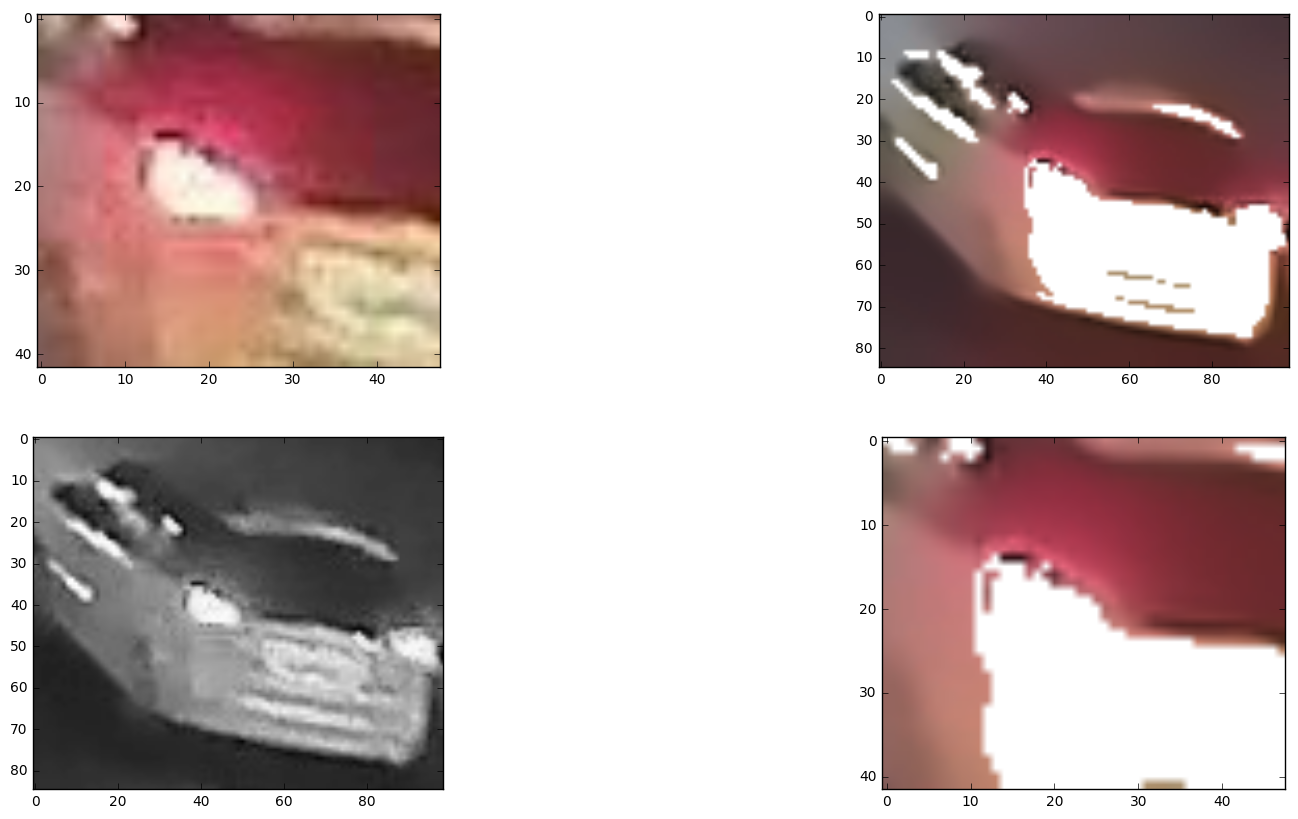

In [10]:
filt = False

img = cv2.imread('./img/redlight6.jpg')#
#img = cv2.imread('./whitebalanced.png')
#img2 = cv2.imread('./redlight6.jpg')
height,width,chann = img.shape


print "red,    yellow,   blue,    green,    white,    black"
print color_detection(img)

filtered_img,mask = imgFilt(img)

filt = True
#filtered_img= imgFilt(img)
print color_detection(img)
grimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


if(detectDark(img)):
    roiWid = 10
    roiEdg = 8
else:
    roiWid = 4
    roiEdg = 2
        
src_height, src_width, src_channels = img.shape
roiX = int(src_width / roiWid)
roiWidth = roiX * roiEdg
roiY = int(src_height / roiWid)
roiHeight = roiY * roiEdg
img = img[roiY : roiY+roiHeight, roiX : roiX+roiWidth]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
filtered_img = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2RGB)

#dst = cv2.imread('./red2.jpg')
plt.figure(figsize=(20,10))
roiimg = img[roiY:roiY+roiHeight, roiX:roiX+roiWidth]
plt.subplot(221),plt.imshow(img)#
#plt.subplot(221),plt.imshow(img2)
plt.subplot(222),plt.imshow(filtered_img)
plt.subplot(223),plt.imshow(grimg ,cmap='gray')
#plt.subplot(223),plt.imshow(redmask)
img = filtered_img[roiY:roiY+roiHeight, roiX:roiX+roiWidth]
plt.subplot(224),plt.imshow(img)
plt.show()


In [ ]:
img = cv2.imread('./redlight6.jpg')
height,width,chann = img.shape
#img = img[325:450,1040:width]
pxls = height*width

hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)

hist = cv2.calcHist(h,[0],None,[256],[0,256])

b,g,r = cv2.split(img)

average_color = [np.average(b),np.average(g),np.average(r)]

print average_color, hist.argmax()



In [ ]:
img = cv2.imread('./redlight8.jpg')
#img = cv2.imread('./whitebalanced.png')
#img2 = cv2.imread('./redlight6.jpg')
height,width,chann = img.shape


print "red,    yellow,   blue,    green,    white,    black"
print color_detection(img)


filtered_img= imgFilt(img)
filtered_img = cv2.cvtColor(filtered_img,cv2.COLOR_HSV2B)

print color_detection(img)
grimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)



src_height, src_width, src_channels = img.shape
roiX = int(src_width / 10)
roiWidth = roiX * 8
roiY = int(src_height / 10)
roiHeight = roiY * 8

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
filtered_img = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2RGB)

#dst = cv2.imread('./red2.jpg')
plt.figure(figsize=(20,10))
roiimg = img[roiY:roiY+roiHeight, roiX:roiX+roiWidth]
plt.subplot(221),plt.imshow(img)
#plt.subplot(221),plt.imshow(img2)
plt.subplot(222),plt.imshow(filtered_img)
plt.subplot(223),plt.imshow(grimg ,cmap='gray')
#plt.subplot(223),plt.imshow(redmask)
img = filtered_img[roiY:roiY+roiHeight, roiX:roiX+roiWidth]
plt.subplot(224),plt.imshow(img)
plt.show()

